In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
train_data=pd.read_excel(r"/home/jr/Documents/ML_Codes/udemy_projects/flight_price/Data_Train.xlsx")
train_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
train_data[train_data["Total_Stops"].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [7]:
train_data[train_data["Route"].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [8]:
train_data.dropna(inplace=True)

In [9]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [11]:
train_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 7.2 MB


In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [13]:
data=train_data.copy()

In [14]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [15]:
def change_into_datetime(col):
    data[col]=pd.to_datetime(data[col])

In [16]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [17]:
date_col=['Date_of_Journey','Dep_Time','Arrival_Time']
for i in date_col:
    change_into_datetime(i)

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10682 non-null  object        
 1   Date_of_Journey  10682 non-null  datetime64[ns]
 2   Source           10682 non-null  object        
 3   Destination      10682 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10682 non-null  datetime64[ns]
 6   Arrival_Time     10682 non-null  datetime64[ns]
 7   Duration         10682 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10682 non-null  object        
 10  Price            10682 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 1001.4+ KB


In [18]:
data['Journey_Date']=data["Date_of_Journey"].dt.day
data["Journey_Month"]=data["Date_of_Journey"].dt.month
data["Journey_Year"]=data["Date_of_Journey"].dt.year

data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-08-08 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-08-08 05:50:00,2024-08-08 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019


In [19]:
def extract_hour_min(df,col):
    df[col+'_hour']=df[col].dt.hour
    df[col+'_minute']=df[col].dt.minute
    return df.head(2)

In [20]:
extract_hour_min(data,"Dep_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-08-08 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-08-08 05:50:00,2024-08-08 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50


In [21]:
extract_hour_min(data,"Arrival_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-08-08 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-08-08 05:50:00,2024-08-08 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15


In [22]:
cols_to_drop=['Dep_Time','Arrival_Time']
data.drop(cols_to_drop,axis=1,inplace=True)
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15


In [23]:
data.shape

(10682, 16)

In [24]:
def flight_dep_time(x):
    if x>4 and x<=8:
        return "Early Morning"
    elif x>8 and x<=12:
        return "Morning"
    elif x>12 and x<=16:
        return "Afternoon"
    elif x>16 and x<=20:
        return "Evening"
    elif x>20 and x<=24:
        return "Night"
    else:
        return "Late_Night"

In [25]:
data["Dep_Time_hour"].apply(flight_dep_time)

0                Night
1        Early Morning
2              Morning
3              Evening
4            Afternoon
             ...      
10678          Evening
10679          Evening
10680    Early Morning
10681          Morning
10682          Morning
Name: Dep_Time_hour, Length: 10682, dtype: object

In [26]:
data["Dep_Time_hour"].apply(flight_dep_time).value_counts()

Dep_Time_hour
Early Morning    2880
Evening          2357
Morning          2209
Afternoon        1731
Night            1040
Late_Night        465
Name: count, dtype: int64

<Axes: xlabel='Dep_Time_hour'>

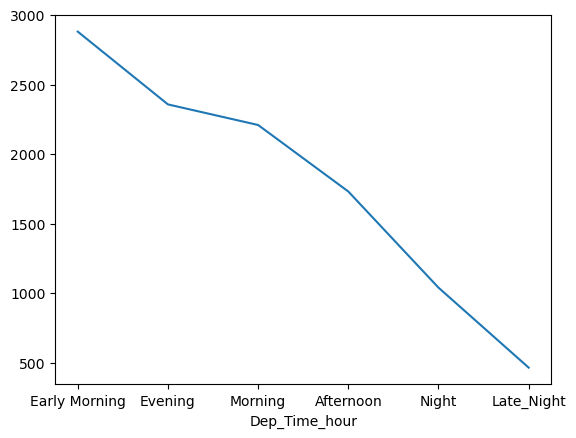

In [27]:
data["Dep_Time_hour"].apply(flight_dep_time).value_counts().plot()

<Axes: xlabel='Dep_Time_hour'>

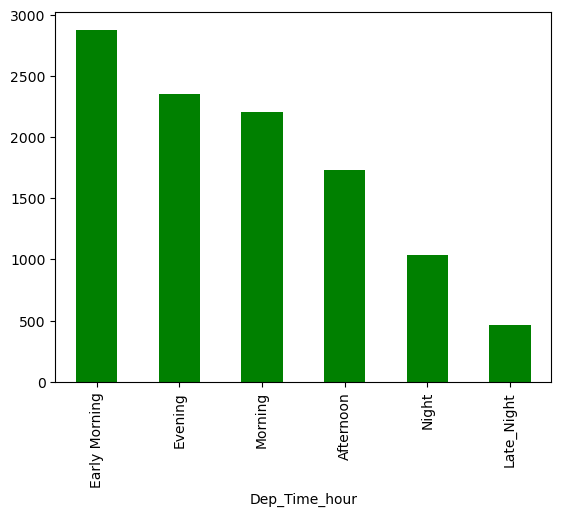

In [28]:
data["Dep_Time_hour"].apply(flight_dep_time).value_counts().plot(kind='bar',color='green')

In [29]:
"""
!pip install plotly
!pip install chart_studio
!pip install cufflinks
"""

'\n!pip install plotly\n!pip install chart_studio\n!pip install cufflinks\n'

In [30]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import plot,iplot,init_notebook_mode,download_plotlyjs
init_notebook_mode(connected=True)
cf.go_offline()

In [31]:
data["Dep_Time_hour"].apply(flight_dep_time).value_counts().iplot(kind='bar')

In [32]:
data['Duration']

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680        3h
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [33]:
def preprocess_duration(x):
    if 'h' not in x:
        x='0h'+' '+x
    elif 'm' not in x:
        x=x+' '+'0m'
    return x

In [34]:
data['Duration'].apply(preprocess_duration)

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [35]:
data["Duration"]=data["Duration"].apply(preprocess_duration)

In [36]:
data["Duration"][0]

'2h 50m'

In [37]:
data["Duration"][0].split(" ")[0]

'2h'

In [38]:
int(data["Duration"][0].split(" ")[0][0:-1])

2

In [39]:
int(data["Duration"][0].split(" ")[1][0:-1])

50

In [40]:
data['Duration_hours']=data['Duration'].apply(lambda x: int(x.split(' ')[0][0:-1]))

In [41]:
data['Duration_mins']=data["Duration"].apply(lambda x: int(x.split(' ')[1][0:-1]))

In [42]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25


In [43]:
# Lets analize whether duration impacts price or not.

In [44]:
data['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1')

0        2*60+50*1
1        7*60+25*1
2        19*60+0*1
3        5*60+25*1
4        4*60+45*1
           ...    
10678    2*60+30*1
10679    2*60+35*1
10680     3*60+0*1
10681    2*60+40*1
10682    8*60+20*1
Name: Duration, Length: 10682, dtype: object

In [45]:
eval('2+3')

5

In [46]:
data['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration, Length: 10682, dtype: int64

In [47]:
data['Duration_total_mins']=data['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [48]:
data['Duration_total_mins']

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration_total_mins, Length: 10682, dtype: int64

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

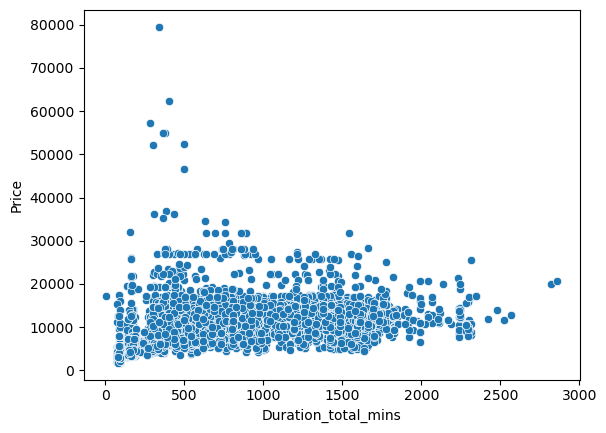

In [49]:
sns.scatterplot(data=data,x="Duration_total_mins" , y="Price")

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

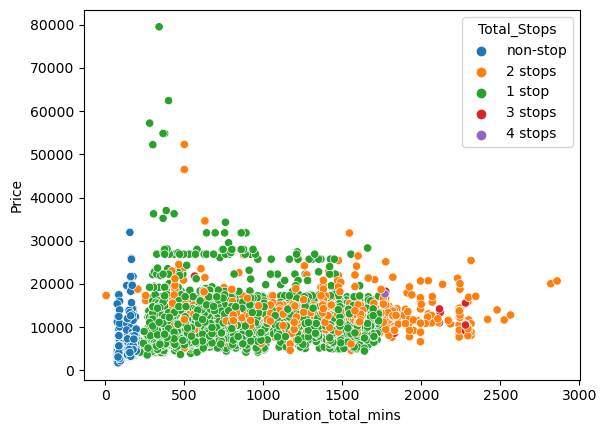

In [50]:
sns.scatterplot(data=data,x="Duration_total_mins" , y="Price",hue='Total_Stops')

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

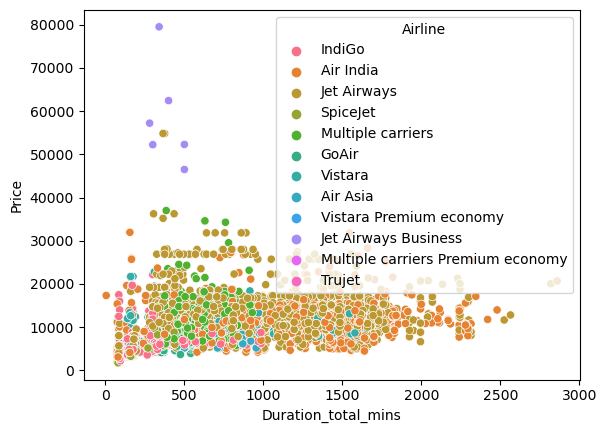

In [51]:
sns.scatterplot(data=data,x="Duration_total_mins" , y="Price",hue='Airline')

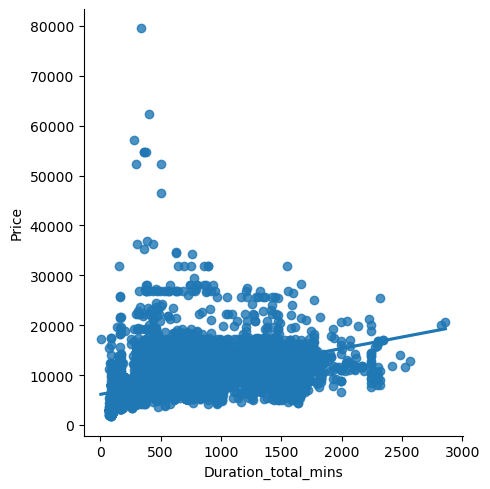

In [52]:
sns.lmplot(x="Duration_total_mins" , y="Price" , data=data)

In [53]:
# On which route jet airways is extreamly used?
# Airline vs Price Analysis

In [54]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25,445


In [55]:
data["Airline"]

0             IndiGo
1          Air India
2        Jet Airways
3             IndiGo
4             IndiGo
            ...     
10678       Air Asia
10679      Air India
10680    Jet Airways
10681        Vistara
10682      Air India
Name: Airline, Length: 10682, dtype: object

In [56]:
data["Airline"]=="Jet Airways"

0        False
1        False
2         True
3        False
4        False
         ...  
10678    False
10679    False
10680     True
10681    False
10682    False
Name: Airline, Length: 10682, dtype: bool

In [57]:
data[data["Airline"]=="Jet Airways"]

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0,1140
6,Jet Airways,2019-03-12,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087,12,3,2019,18,55,10,25,15,30,930
7,Jet Airways,2019-03-01,Banglore,New Delhi,BLR → BOM → DEL,21h 5m,1 stop,No info,22270,1,3,2019,8,0,5,5,21,5,1265
8,Jet Airways,2019-03-12,Banglore,New Delhi,BLR → BOM → DEL,25h 30m,1 stop,In-flight meal not included,11087,12,3,2019,8,55,10,25,25,30,1530
13,Jet Airways,2019-05-09,Kolkata,Banglore,CCU → BOM → BLR,12h 10m,1 stop,In-flight meal not included,9663,9,5,2019,21,10,9,20,12,10,730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10668,Jet Airways,2019-05-09,Delhi,Cochin,DEL → JDH → BOM → COK,7h 20m,2 stops,No info,21219,9,5,2019,11,40,19,0,7,20,440
10672,Jet Airways,2019-06-27,Delhi,Cochin,DEL → AMD → BOM → COK,19h 55m,2 stops,In-flight meal not included,11150,27,6,2019,23,5,19,0,19,55,1195
10673,Jet Airways,2019-05-27,Delhi,Cochin,DEL → AMD → BOM → COK,15h 0m,2 stops,No info,16704,27,5,2019,13,25,4,25,15,0,900
10674,Jet Airways,2019-03-12,Banglore,New Delhi,BLR → BOM → DEL,24h 45m,1 stop,In-flight meal not included,11087,12,3,2019,20,35,21,20,24,45,1485


In [58]:
data[data["Airline"]=="Jet Airways"].groupby("Route").count()

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
Route,,,,,,,,,,,,,,,,,,
BLR → BDQ → DEL,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
BLR → BOM → DEL,385,385,385,385,385,385,385,385,385,385,385,385,385,385,385,385,385,385
BLR → BOM → JDH → DEL,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
BLR → DEL,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382
BLR → MAA → DEL,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
BOM → BDQ → DEL → HYD,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
BOM → DED → DEL → HYD,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
BOM → DEL → HYD,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
BOM → HYD,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207


In [59]:
data[data["Airline"]=="Jet Airways"].groupby("Route").size()

Route
BLR → BDQ → DEL            8
BLR → BOM → DEL          385
BLR → BOM → JDH → DEL      3
BLR → DEL                382
BLR → MAA → DEL           10
BOM → BDQ → DEL → HYD      2
BOM → DED → DEL → HYD      1
BOM → DEL → HYD            5
BOM → HYD                207
BOM → IDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → VNS → DEL → HYD      1
CCU → BOM → BLR          930
CCU → BOM → PNQ → BLR      4
CCU → DEL → BLR          300
CCU → GAU → BLR           22
DEL → AMD → BOM → COK    141
DEL → ATQ → BOM → COK     38
DEL → BDQ → BOM → COK     28
DEL → BHO → BOM → COK     29
DEL → BOM → COK          875
DEL → CCU → BOM → COK      1
DEL → COK                 34
DEL → DED → BOM → COK      2
DEL → IDR → BOM → COK     86
DEL → IXC → BOM → COK     13
DEL → JAI → BOM → COK    207
DEL → JDH → BOM → COK     23
DEL → LKO → BOM → COK     25
DEL → MAA → BOM → COK     16
DEL → NAG → BOM → COK     61
DEL → UDR → BOM → COK      7
dtype: int64

In [60]:
data[data["Airline"]=="Jet Airways"].groupby("Route").size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

In [61]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_Date',
       'Journey_Month', 'Journey_Year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_total_mins'],
      dtype='object')

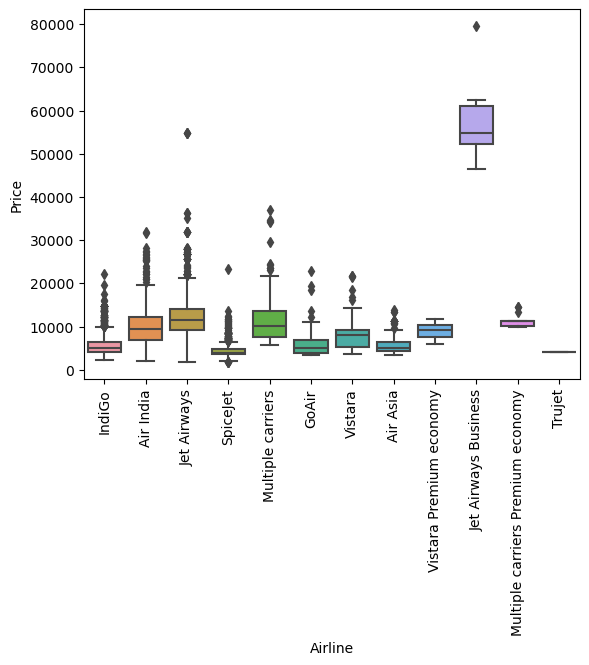

In [62]:
sns.boxplot(x='Airline', y='Price',data=data)
plt.xticks(rotation='vertical')
plt.show()

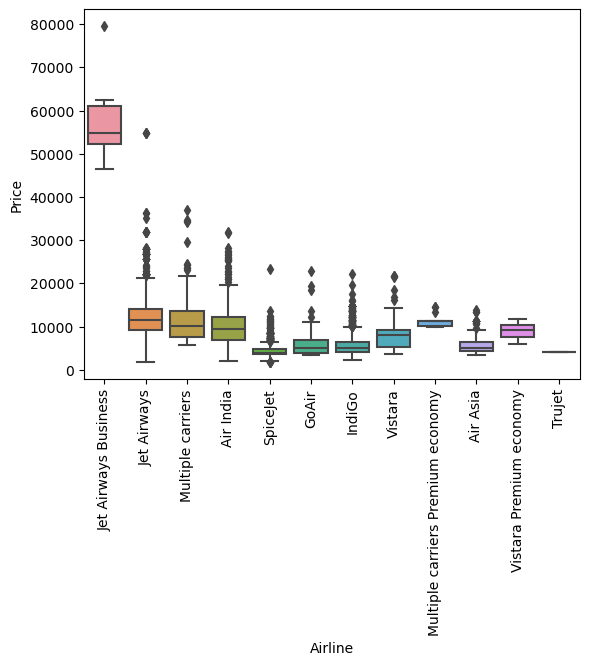

In [63]:
sns.boxplot(x='Airline', y='Price',data=data.sort_values('Price' , ascending=False))
plt.xticks(rotation='vertical')
plt.show()

In [64]:
# One-hot encoding

In [65]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25,445


In [66]:
cat_col=[i for i in data.columns if data[i].dtype=="object"]
num_col=[i for i in data.columns if data[i].dtype!='object']

In [67]:
cat_col

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [68]:
num_col

['Date_of_Journey',
 'Price',
 'Journey_Date',
 'Journey_Month',
 'Journey_Year',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_hours',
 'Duration_mins',
 'Duration_total_mins']

In [69]:
data['Source']

0        Banglore
1         Kolkata
2           Delhi
3         Kolkata
4        Banglore
           ...   
10678     Kolkata
10679     Kolkata
10680    Banglore
10681    Banglore
10682       Delhi
Name: Source, Length: 10682, dtype: object

In [70]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [71]:
data['Source'].apply(lambda x: 1 if x=='Banglore' else 0)

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10682, dtype: int64

In [72]:
for sub_category in data['Source'].unique():
    data["Source_"+sub_category]=data["Source"].apply(lambda x: 1 if x==sub_category else 0)

In [73]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Date,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0


In [74]:
data["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [75]:
# Target Guided Ordinal Encoding

In [76]:
data.groupby("Airline")["Price"].mean().sort_values()

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9612.427756
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

In [77]:
data.groupby("Airline")["Price"].mean().sort_values()

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9612.427756
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

In [78]:
Airlines=data.groupby("Airline")["Price"].mean().sort_values().index
Airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [79]:
dict_airlines={key:index for index,key in enumerate(Airlines,0)}
dict_airlines

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [80]:
data["Airline"]=data["Airline"].map(dict_airlines)
data["Airline"]

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [81]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Date,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0


In [82]:
data["Destination"].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [83]:
data["Destination"].replace('New Delhi', "Delhi", inplace=True)

In [84]:
data["Destination"].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [85]:
dest=data.groupby('Destination')["Price"].mean().sort_values().index
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [86]:
dict_dest={key:index for index,key in enumerate(dest,0)}
dict_dest

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [87]:
data["Destination"]=data["Destination"].map(dict_dest)
data["Destination"]

0        2
1        3
2        4
3        3
4        2
        ..
10678    3
10679    3
10680    2
10681    2
10682    4
Name: Destination, Length: 10682, dtype: int64

In [88]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Date,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0


In [89]:
data["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [90]:
stop={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [91]:
data["Total_Stops"]=data["Total_Stops"].map(stop)
data["Total_Stops"]

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

In [92]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Date,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,0,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0


In [93]:
data["Additional_Info"].value_counts()

Additional_Info
No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [94]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_Date',
       'Journey_Month', 'Journey_Year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_total_mins', 'Source_Banglore',
       'Source_Kolkata', 'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [95]:
data.drop(columns=['Date_of_Journey','Additional_Info','Duration_total_mins','Journey_Year','Source'],axis=1,inplace=True)

In [96]:
data.columns

Index(['Airline', 'Destination', 'Route', 'Duration', 'Total_Stops', 'Price',
       'Journey_Date', 'Journey_Month', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Source_Banglore', 'Source_Kolkata', 'Source_Delhi',
       'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [97]:
data.head(2)

,Airline,Destination,Route,Duration,Total_Stops,Price,Journey_Date,Journey_Month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,BLR → DEL,2h 50m,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,CCU → IXR → BBI → BLR,7h 25m,2,7662,1,5,5,50,13,15,7,25,0,1,0,0,0


In [98]:
data.drop(columns=['Route'],axis=1,inplace=True)

In [99]:
data.head(2)

,Airline,Destination,Duration,Total_Stops,Price,Journey_Date,Journey_Month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,2h 50m,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,7h 25m,2,7662,1,5,5,50,13,15,7,25,0,1,0,0,0


In [100]:
data.drop(columns=['Duration'],axis=1,inplace=True)
data.head(2)

,Airline,Destination,Total_Stops,Price,Journey_Date,Journey_Month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662,1,5,5,50,13,15,7,25,0,1,0,0,0


In [101]:
# Outlier detection

In [102]:
def plot(df,col):
    fig, (ax1,ax2,ax3)=plt.subplots(3,1)

    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2,orient="h")
    sns.distplot(df[col],ax=ax3,kde=False)

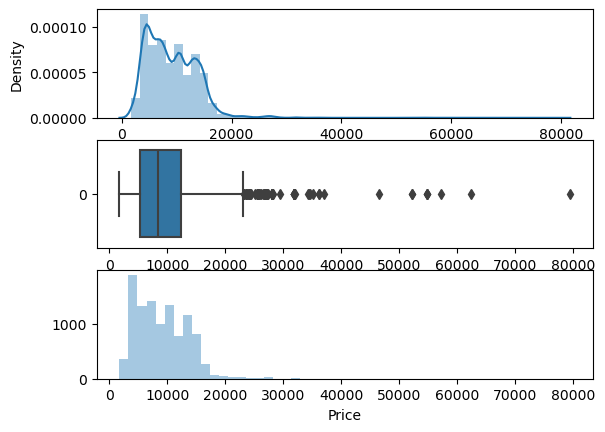

In [103]:
plot(data,'Price')

In [104]:
len(data["Price"])

10682

In [105]:
data.shape

(10682, 17)

In [106]:
data["Price"].min(),data["Price"].max()

(1759, 79512)

In [107]:
data["Price"].mean(),data["Price"].median(),data["Price"].mode()

(9087.21456656057,
 8372.0,
 0    10262
 Name: Price, dtype: int64)

In [108]:
data_price=data["Price"]


In [109]:
data_price=sorted(data_price)
data_price

[1759,
 1759,
 1759,
 1759,
 1840,
 1965,
 1965,
 1965,
 1965,
 1965,
 1965,
 1965,
 1965,
 1965,
 1965,
 1965,
 1965,
 1965,
 1965,
 1965,
 1965,
 1965,
 1965,
 1965,
 1965,
 1965,
 1965,
 1965,
 1965,
 1965,
 1965,
 1965,
 1965,
 1965,
 1965,
 1965,
 1965,
 1965,
 1965,
 1965,
 1965,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2050,
 2050,
 2050,
 2050,
 2050,
 2050,
 2050,
 2050,
 2050,
 2050,
 2071,
 2071,
 2071,
 2071,
 2071,
 2071,
 2175,
 2175,
 2175,
 2175,
 2175,
 2175,
 2175,
 2227,
 2227,
 2227,
 2227,
 2227,
 2227,
 2227,
 2227,
 2227,
 2227,
 2227,
 2227,
 2227,
 2227,
 2227,
 2227,
 2227,
 2227,
 2227,
 2227,
 2227,
 2227,
 2227,
 2227,
 2227,
 2227,
 2227,
 2227,
 2227,
 2227,
 2227,
 2227,
 2227,
 2227,
 2227,
 2227,
 2227,
 2227,
 2227,
 2227,
 2228,
 2228,
 2228,
 2228,

In [110]:
len(data_price)

10682

In [111]:
data["Price"].quantile(0.1)

3943.0

In [112]:
data_price[1067]

3943

In [113]:
q1=data["Price"].quantile(0.25)
q3=data["Price"].quantile(0.75)

iqr=q3-q1

maximum=q3+1.5*iqr
minimum=q1-1.5*iqr

In [114]:
print(maximum)
print(minimum)

23017.0
-5367.0


In [115]:
print([price for price in data["Price"] if price>maximum or price<minimum])

[27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]


In [117]:
len([price for price in data["Price"] if price>maximum or price<minimum])

94

In [118]:
data["Price"]=np.where(data["Price"]>35000,data["Price"].median(),data["Price"])

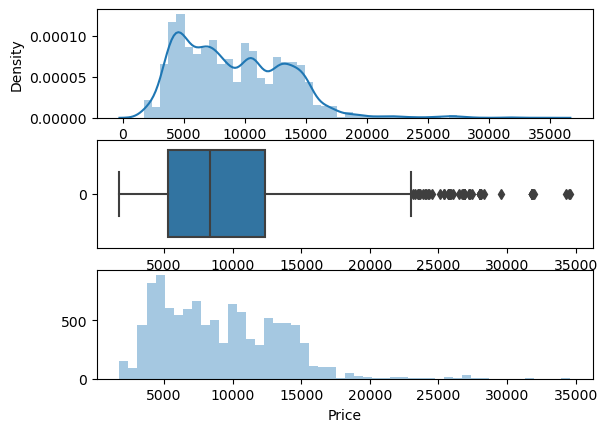

In [119]:
plot(data,'Price')

In [121]:
# Feature Selection--Mutual Information Approach

In [122]:
X=data.drop(["Price"],axis=1)
y=data["Price"]

In [123]:
X.shape,y.shape

((10682, 16), (10682,))

In [124]:
from sklearn.feature_selection import mutual_info_regression

In [125]:
imp=mutual_info_regression(X,y)
imp

array([0.97875299, 1.00401206, 0.79432736, 0.24100155, 0.61731414,
       0.33676477, 0.26007952, 0.39505741, 0.34653646, 0.46865631,
       0.34337469, 0.38858788, 0.45538898, 0.52678177, 0.1403765 ,
       0.19707277])

In [127]:
imp_df=pd.DataFrame(imp,X.columns)
imp_df

,0
Airline,0.978753
Destination,1.004012
Total_Stops,0.794327
Journey_Date,0.241002
Journey_Month,0.617314
Dep_Time_hour,0.336765
Dep_Time_minute,0.260080
Arrival_Time_hour,0.395057
Arrival_Time_minute,0.346536
Duration_hours,0.468656


In [128]:
imp_df.columns=["Importance"]
imp_df

,Importance
Airline,0.978753
Destination,1.004012
Total_Stops,0.794327
Journey_Date,0.241002
Journey_Month,0.617314
Dep_Time_hour,0.336765
Dep_Time_minute,0.260080
Arrival_Time_hour,0.395057
Arrival_Time_minute,0.346536
Duration_hours,0.468656


In [130]:
imp_df.sort_values(by="Importance",ascending=False)

,Importance
Destination,1.004012
Airline,0.978753
Total_Stops,0.794327
Journey_Month,0.617314
Source_Delhi,0.526782
Duration_hours,0.468656
Source_Kolkata,0.455389
Arrival_Time_hour,0.395057
Source_Banglore,0.388588
Arrival_Time_minute,0.346536


In [131]:
from sklearn.model_selection import train_test_split

In [132]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [133]:
from sklearn.ensemble import RandomForestRegressor

ml_model=RandomForestRegressor()
ml_model.fit(X_train,y_train)

RandomForestRegressor()

In [134]:
y_pred=ml_model.predict(X_test)

In [135]:
from sklearn.metrics import r2_score

r2_score(y_test,y_pred)

0.8129009604736317

In [136]:
# Saving the model

In [137]:
import pickle

In [140]:
file=open(r'rf_random.pkl','wb')

In [141]:
pickle.dump(ml_model,file)

In [142]:
model=open(r'rf_random.pkl','rb')

In [143]:
forest=pickle.load(model)

In [144]:
y_pred2=forest.predict(X_test)

In [145]:
r2_score(y_test,y_pred2)

0.8129009604736317

In [146]:
# Randomized search cv

In [147]:
from sklearn.model_selection import RandomizedSearchCV

In [148]:
reg_ref=RandomForestRegressor()

In [149]:
np.linspace(start=100,stop=1200,num=6)

array([ 100.,  320.,  540.,  760.,  980., 1200.])

In [150]:
n_estimators=[int(i) for i in np.linspace(start=100,stop=1200,num=6)]
max_features=["auto","sqrt"]
max_depth=[int(i) for i in np.linspace(start=5,stop=30,num=4)]
min_samples_split=[5,10,15,100]

In [151]:
random_grid={'n_estimators':n_estimators,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split}

In [152]:
rf_random=RandomizedSearchCV(estimator=reg_ref,param_distributions=random_grid,cv=3,n_jobs=-1,verbose=2)

In [153]:
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/home/jr/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/jr/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/jr/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END max_depth=5, max_features=auto, min_samples_split=5, n_estimators=320; total time=   4.5s
[CV] END max_depth=5, max_features=auto, min_samples_split=5, n_estimators=320; total time=   6.3s
[CV] END max_depth=5, max_features=auto, min_samples_split=5, n_estimators=320; total time=   6.6s
[CV] END max_depth=21, max_features=sqrt, min_samples_split=5, n_estimators=760; total time=  13.2s
[CV] END max_depth=21, max_features=sqrt, min_samples_split=5, n_estimators=760; total time=  14.8s


/home/jr/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=21, max_features=sqrt, min_samples_split=5, n_estimators=760; total time=  15.4s


/home/jr/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=21, max_features=sqrt, min_samples_split=15, n_estimators=980; total time=  14.0s


/home/jr/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=21, max_features=sqrt, min_samples_split=15, n_estimators=980; total time=  14.5s


/home/jr/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=21, max_features=sqrt, min_samples_split=15, n_estimators=980; total time=  13.9s


/home/jr/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_split=15, n_estimators=1200; total time=  30.9s


/home/jr/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_split=15, n_estimators=540; total time=  16.8s
[CV] END max_depth=21, max_features=auto, min_samples_split=5, n_estimators=320; total time=  14.8s
[CV] END max_depth=21, max_features=auto, min_samples_split=5, n_estimators=320; total time=  12.0s
[CV] END max_depth=30, max_features=auto, min_samples_split=15, n_estimators=540; total time=  20.7s


/home/jr/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_split=15, n_estimators=1200; total time=  41.9s


/home/jr/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_split=15, n_estimators=540; total time=  21.9s


/home/jr/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_split=15, n_estimators=1200; total time=  42.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_split=5, n_estimators=1200; total time=  10.9s


/home/jr/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/jr/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=sqrt, min_samples_split=5, n_estimators=1200; total time=   8.4s
[CV] END max_depth=21, max_features=auto, min_samples_split=5, n_estimators=320; total time=  13.5s


/home/jr/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=sqrt, min_samples_split=5, n_estimators=1200; total time=  11.7s
[CV] END max_depth=5, max_features=auto, min_samples_split=15, n_estimators=540; total time=  10.8s
[CV] END max_depth=5, max_features=auto, min_samples_split=15, n_estimators=540; total time=   9.6s
[CV] END max_depth=13, max_features=auto, min_samples_split=15, n_estimators=320; total time=   9.4s
[CV] END max_depth=5, max_features=auto, min_samples_split=15, n_estimators=540; total time=  10.2s
[CV] END max_depth=13, max_features=auto, min_samples_split=15, n_estimators=320; total time=   9.9s
[CV] END max_depth=13, max_features=sqrt, min_samples_split=100, n_estimators=760; total time=   8.2s
[CV] END max_depth=13, max_features=auto, min_samples_split=15, n_estimators=320; total time=   8.9s
[CV] END max_depth=13, max_features=sqrt, min_samples_split=100, n_estimators=760; total time=   4.8s
[CV] END max_depth=13, max_features=sqrt, min_samples_split=100, n_estimators=760; total time

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [154]:
rf_random.best_params_

{'n_estimators': 320,
 'min_samples_split': 15,
 'max_features': 'auto',
 'max_depth': 13}

In [155]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=13, max_features='auto', min_samples_split=15,
                      n_estimators=320)

In [156]:
rf_random.best_score_

0.81457618057606